# Stroke Risk Analysis

## Dataset Summary
- 5110 records, 11 features + target
- Binary classification: stroke vs no stroke

## Key Candidate Findings
- Stroke risk rises sharply with age >60
- Hypertension and heart disease are strong predictors
- High glucose and BMI levels correlate with stroke
- Smoking history increases risk
- Class imbalance requires careful modeling

## Recommendations
- Use ensemble models with class balancing
- Prioritize health indicators in feature selection
- Consider public health interventions targeting older adults with chronic conditions

In [15]:
# Description: Exploratory analysis and modeling on stroke dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load Data
df = pd.read_csv("./Datasets/StrokePredictionDataset/healthcare-dataset-stroke-data.csv")
df.replace("N/A", np.nan, inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [17]:
st_df = df.where(df['stroke'] == 1)
st_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046.0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0
1,51676.0,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1.0
2,31112.0,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0
3,60182.0,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0
4,1665.0,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Data Cleaning
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df.dropna(subset=['age', 'avg_glucose_level'], inplace=True)

/var/folders/sv/8qrp9kb16sjbbcys97bsvg900000gn/T/ipykernel_19679/905134211.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [19]:
numeric_cols = [
    'age',
    'hypertension',
    'heart_disease',
    'avg_glucose_level',
    'bmi',
    'stroke'
]
plot_cols = [
    'age',
    'hypertension',
    'bmi',
]

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [20]:
# Encode categorical variables
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})
df['Residence_type'] = df['Residence_type'].map({'Rural': 0, 'Urban': 1})
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)

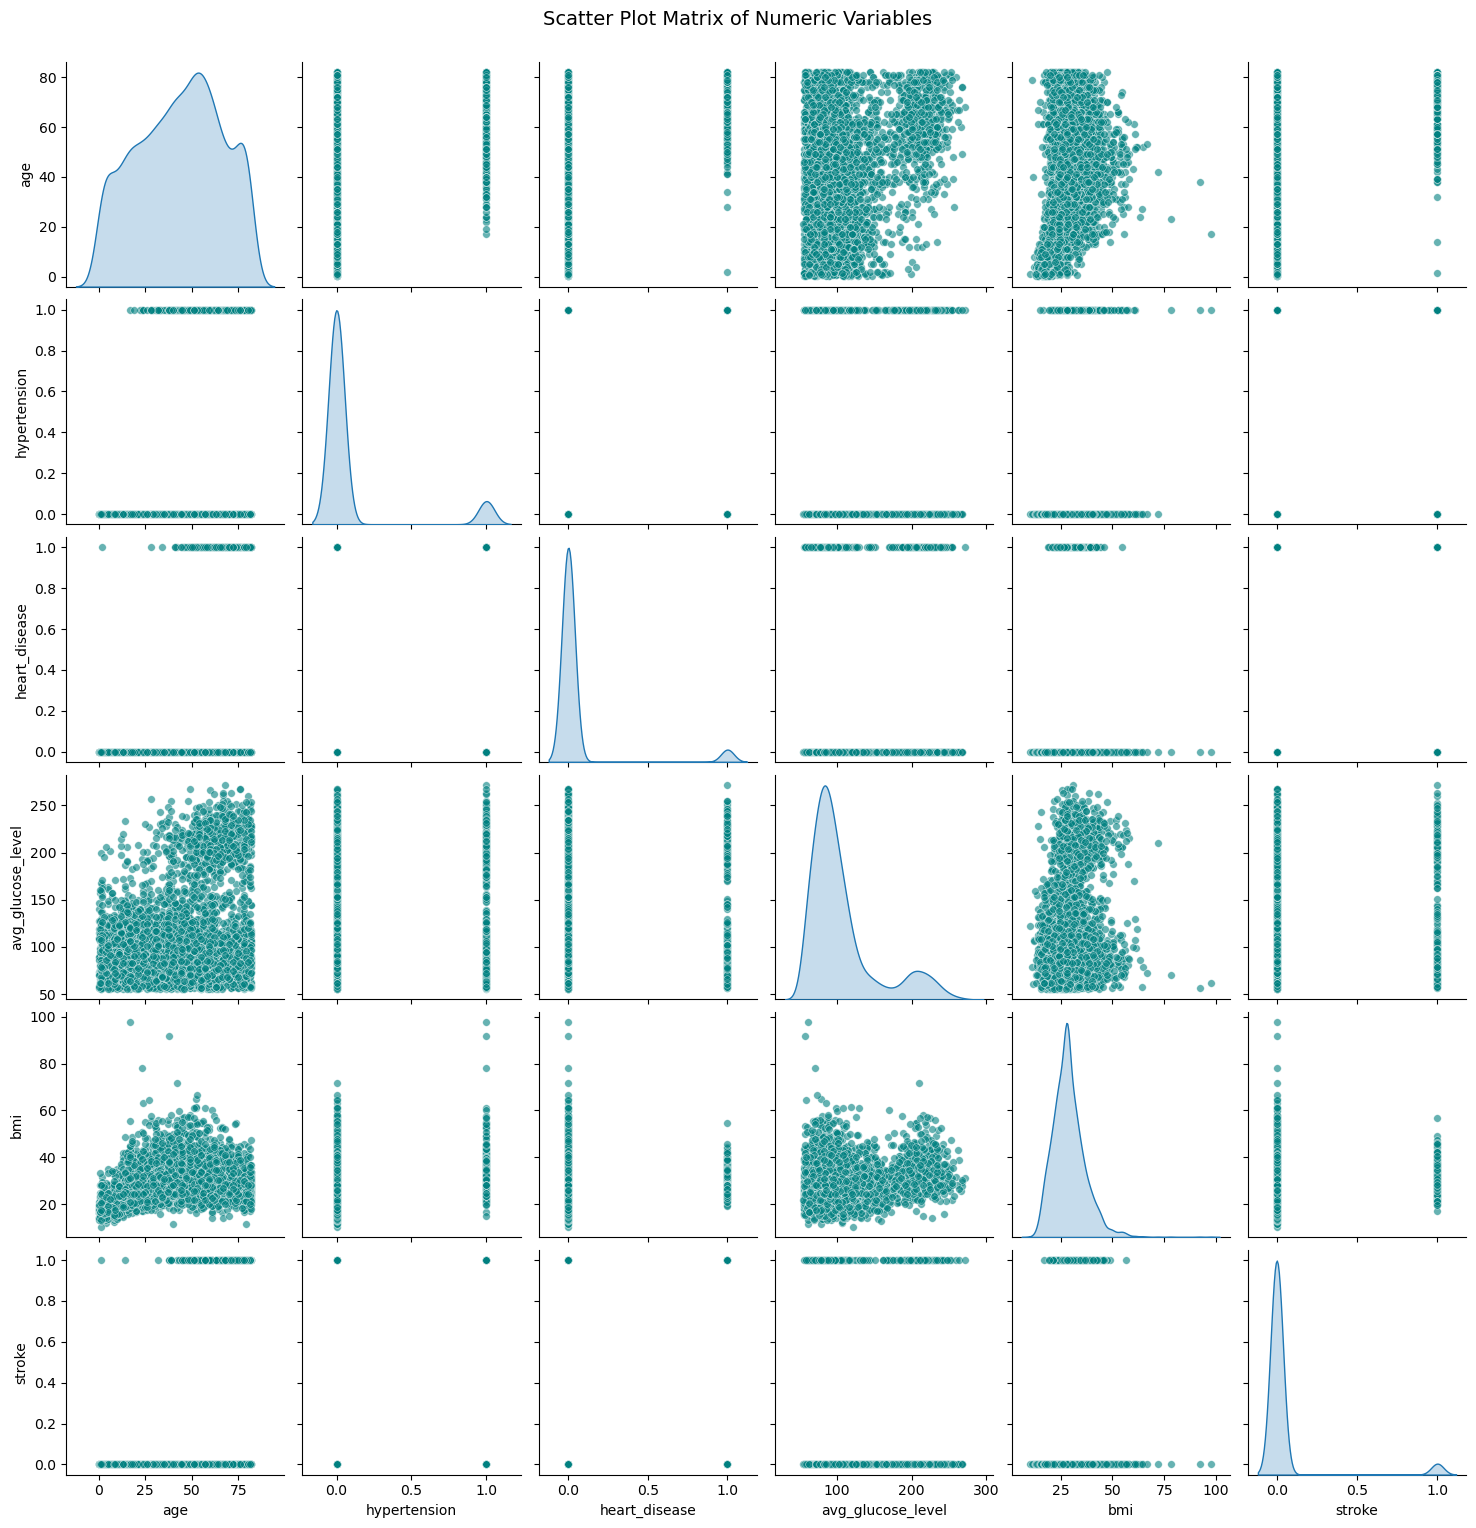

In [21]:
sns.pairplot(df[numeric_cols], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30, 'color': 'teal'})

plt.suptitle("Scatter Plot Matrix of Numeric Variables", y=1.02, fontsize=14)
plt.show()

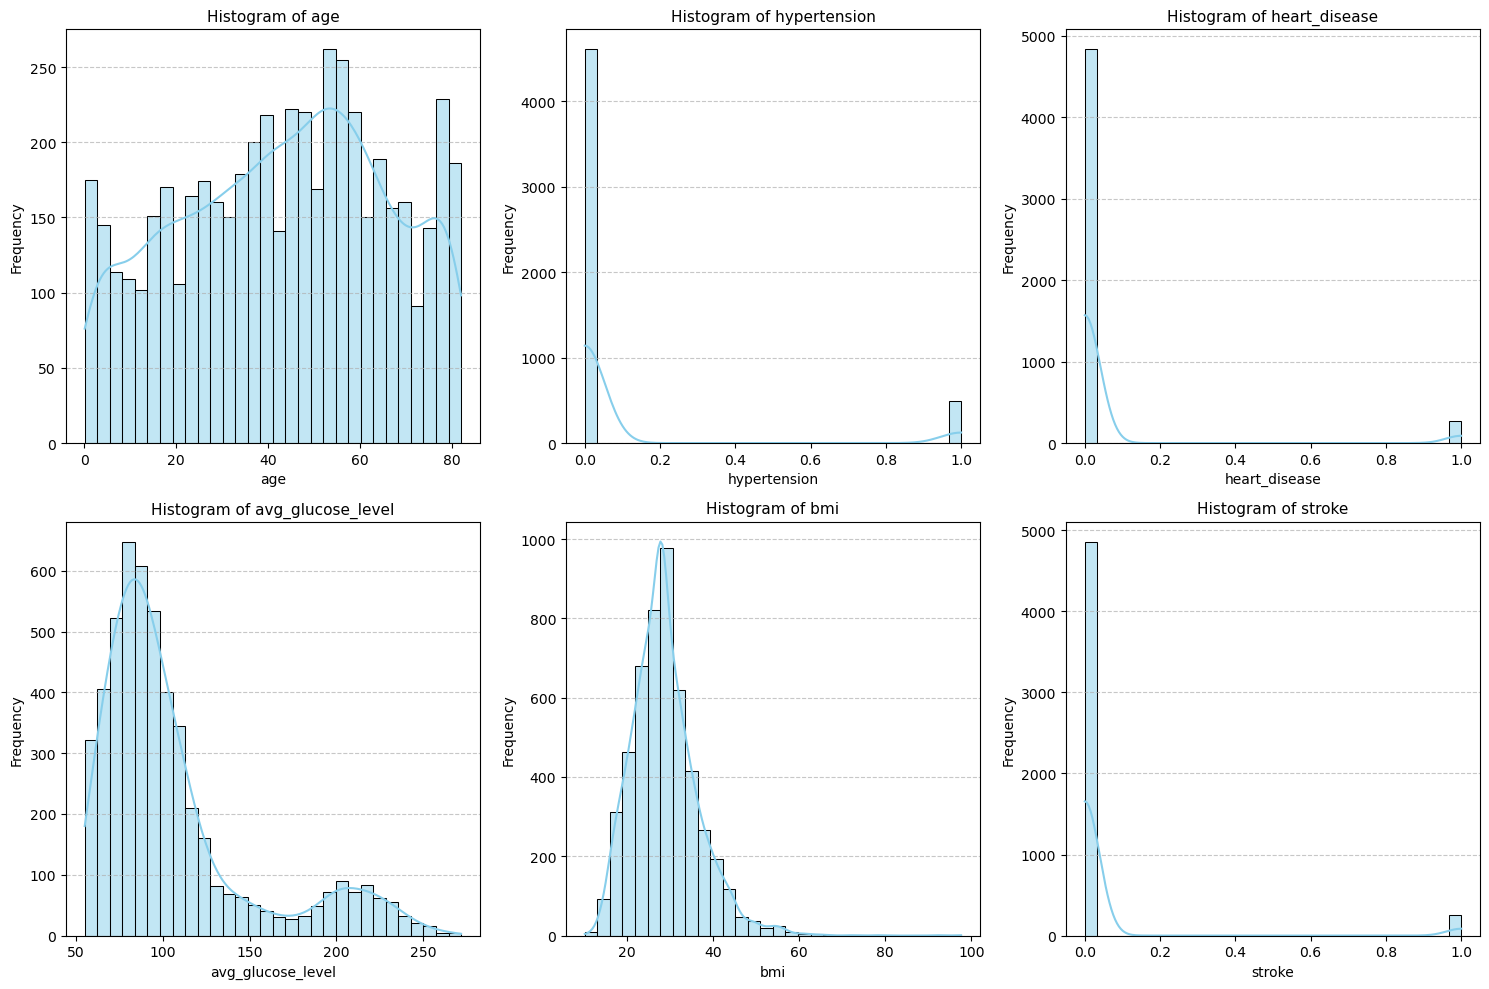

In [22]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i) 
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram of {col}', fontsize=11)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

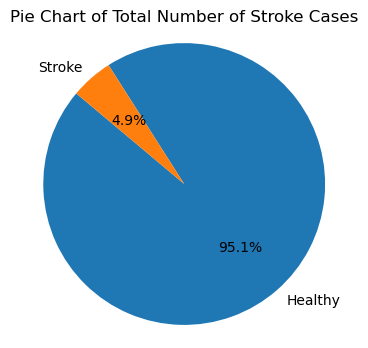

In [23]:
#Distribution of Response
# Calculate the frequency of each category in the response variable
response_counts = df['stroke'].value_counts()

# Replace 0 with 'Healthy' and 1 with 'Stroke'
response_labels = ['Healthy' if label == 0 else 'Stroke' for label in response_counts.index]

# Plot the pie chart with modified labels
plt.figure(figsize=(4, 4))
plt.pie(response_counts, labels=response_labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Total Number of Stroke Cases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Text(0.5, 1.0, 'Stroke Distribution')

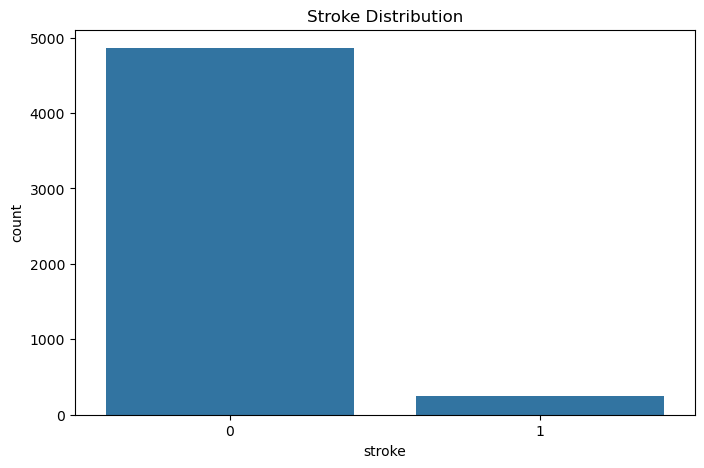

In [24]:
# EDA
plt.figure(figsize=(8,5))
sns.countplot(x='stroke', data=df)
plt.title("Stroke Distribution")

gender
Female    141
Male      108
Name: count, dtype: int64


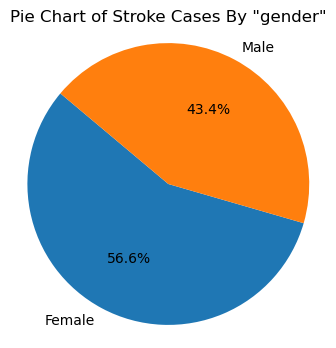

In [25]:
#Distribution of Response
# Calculate the frequency of each category in the response variable
response_counts = st_df['gender'].value_counts()
print(response_counts)

response_labels = ['Female', 'Male']

# Plot the pie chart with modified labels
plt.figure(figsize=(4, 4))
plt.pie(response_counts, labels=response_labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Stroke Cases By "gender"')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

smoking_status
never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: count, dtype: int64


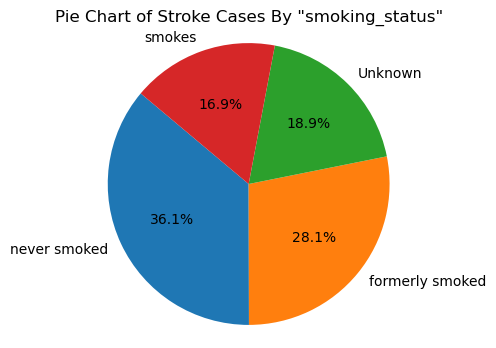

In [26]:
#Distribution of Response
# Calculate the frequency of each category in the response variable
response_counts = st_df['smoking_status'].value_counts()
print(response_counts)

response_labels = ['never smoked', 'formerly smoked', 'Unknown', 'smokes']

# Plot the pie chart with modified labels
plt.figure(figsize=(4, 4))
plt.pie(response_counts, labels=response_labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Stroke Cases By "smoking_status"')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


Residence_type
Urban    135
Rural    114
Name: count, dtype: int64


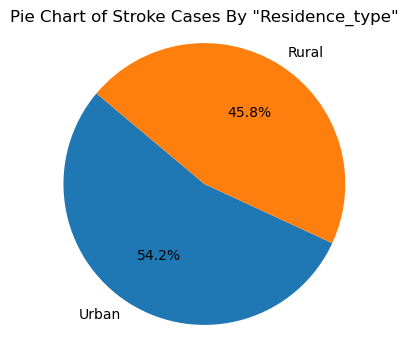

In [27]:
#Distribution of Response
# Calculate the frequency of each category in the response variable
response_counts = st_df['Residence_type'].value_counts()
print(response_counts)

response_labels = ['Urban', 'Rural']

# Plot the pie chart with modified labels
plt.figure(figsize=(4, 4))
plt.pie(response_counts, labels=response_labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Stroke Cases By "Residence_type"')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Note: Urban vs Rural Analysis
It's interesting that, despite population differences between urban and rural areas, stroke occurence is similarly represented in this dataset.

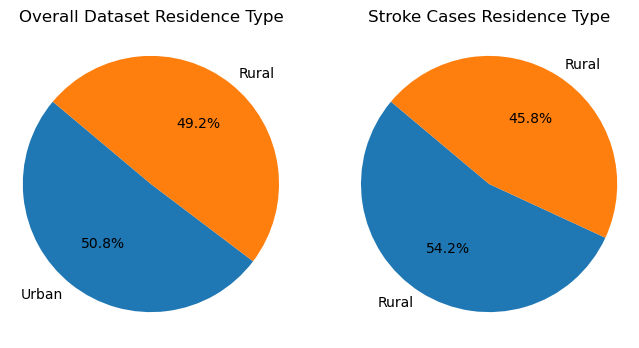

In [28]:
# Total representation of urban vs rural in dataset, as compared to urban vs rural in stroke cases
residence_counts = df['Residence_type'].value_counts()
residence_labels = ['Urban' if label == 1 else 'Rural' for label in residence_counts.index]
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.pie(residence_counts, labels=residence_labels, autopct='%1.1f%%', startangle=140)
plt.title('Overall Dataset Residence Type')
plt.axis('equal')
plt.subplot(1, 2, 2)
st_residence_counts = st_df['Residence_type'].value_counts()
st_residence_labels = ['Urban' if label == 1 else 'Rural' for label in st_residence_counts.index]
plt.pie(st_residence_counts, labels=st_residence_labels, autopct='%1.1f%%', startangle=140)
plt.title('Stroke Cases Residence Type')
plt.axis('equal')
plt.show()



It turns out the proportion of urban vs rural residents in the stroke positive dataset is similar to the proportion of urban vs rural residents in the overall dataset.

Text(0.5, 1.0, 'Feature Correlation Matrix')

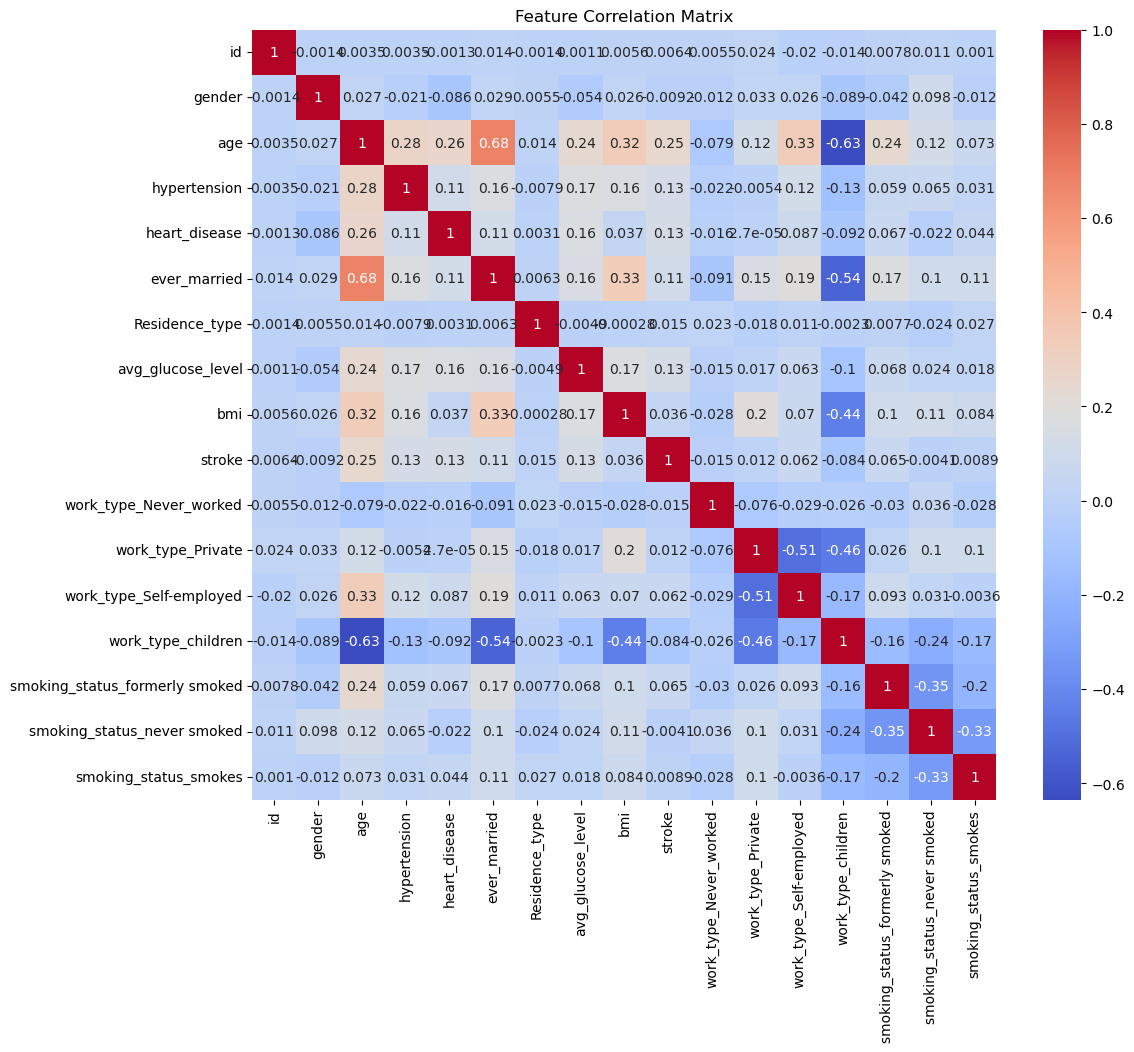

In [29]:
# Correlation
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")

Text(0.5, 1.0, 'Age Distribution by Stroke')

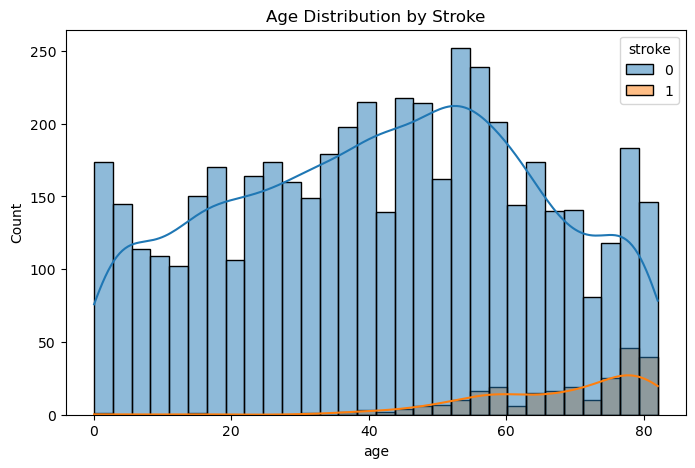

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='stroke', bins=30, kde=True)
plt.title("Age Distribution by Stroke")

Text(0.5, 1.0, 'Hypertension Distribution by Stroke')

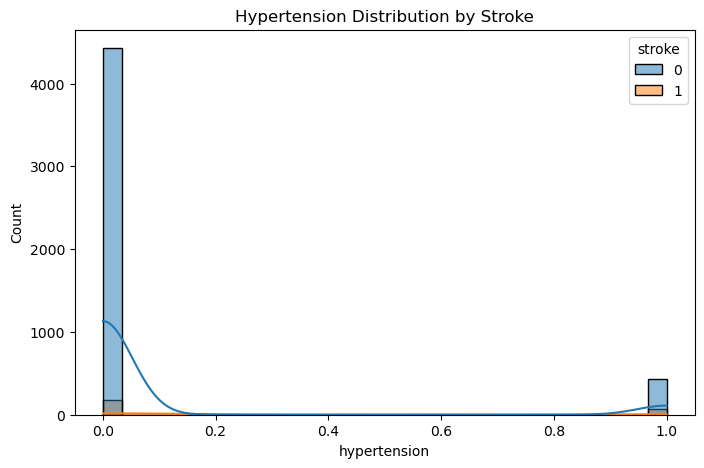

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='hypertension', hue='stroke', bins=30, kde=True)
plt.title("Hypertension Distribution by Stroke")

Text(0.5, 1.0, 'Heart Disease Distribution by Stroke')

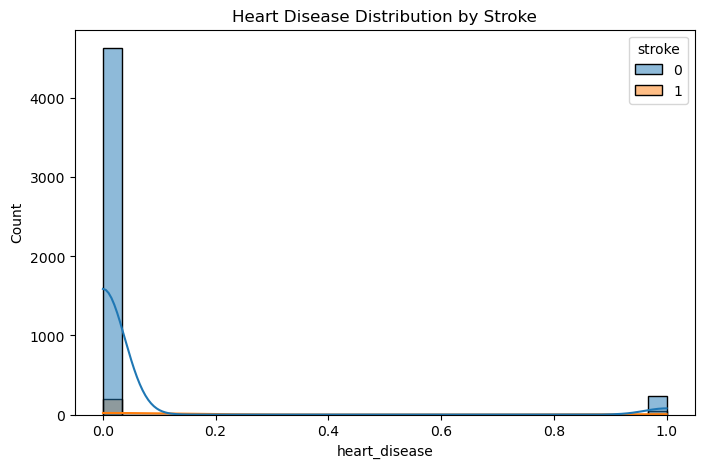

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='heart_disease', hue='stroke', bins=30, kde=True)
plt.title("Heart Disease Distribution by Stroke")

Text(0.5, 1.0, 'Average Glucose Level Distribution by Stroke')

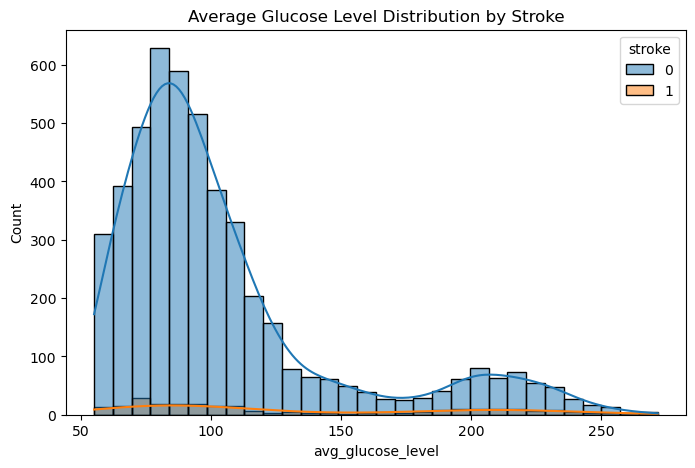

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='avg_glucose_level', hue='stroke', bins=30, kde=True)
plt.title("Average Glucose Level Distribution by Stroke")

Text(0.5, 1.0, 'BMI Distribution by Stroke')

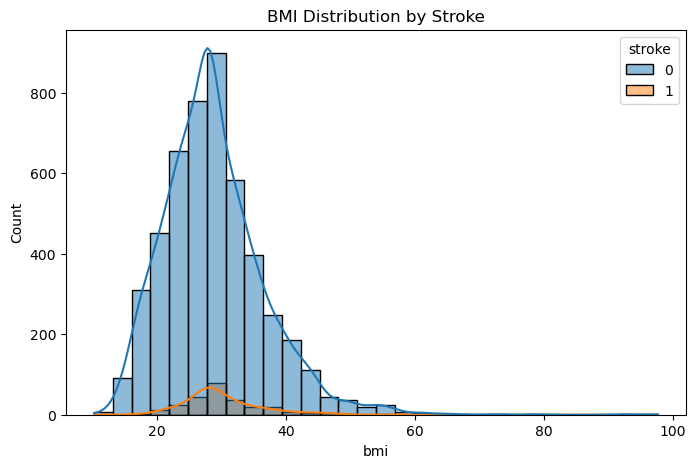

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='bmi', hue='stroke', bins=30, kde=True)
plt.title("BMI Distribution by Stroke")

Text(0.5, 1.0, 'Gender Distribution by Stroke')

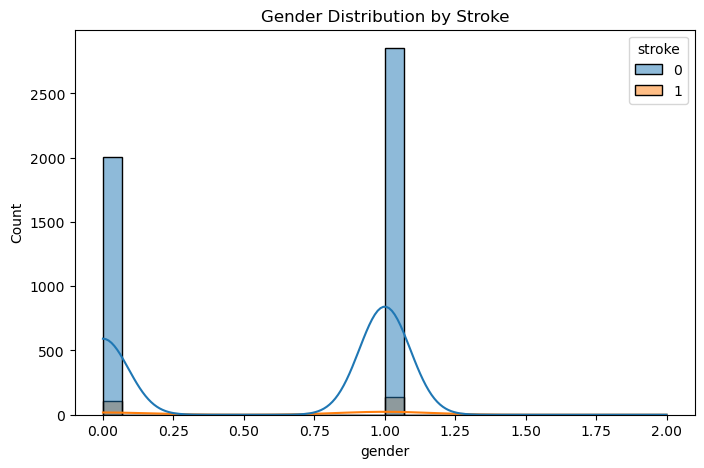

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='gender', hue='stroke', bins=30, kde=True)
plt.title("Gender Distribution by Stroke")

Text(0.5, 1.0, 'Ever Married Distribution by Stroke')

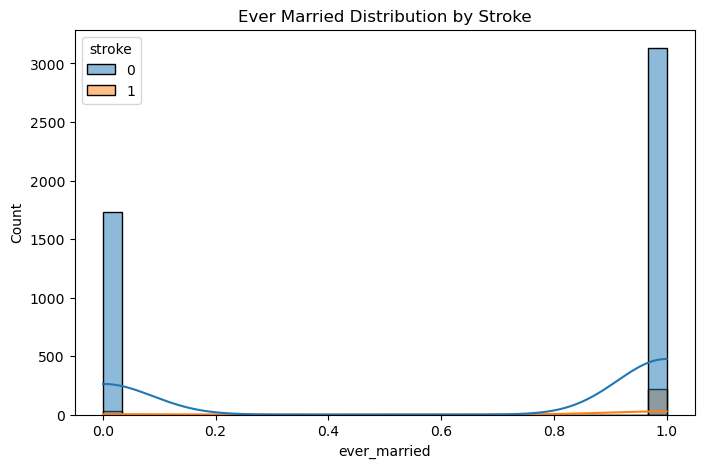

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='ever_married', hue='stroke', bins=30, kde=True)
plt.title("Ever Married Distribution by Stroke")

Text(0.5, 1.0, 'Residence Type Distribution by Stroke')

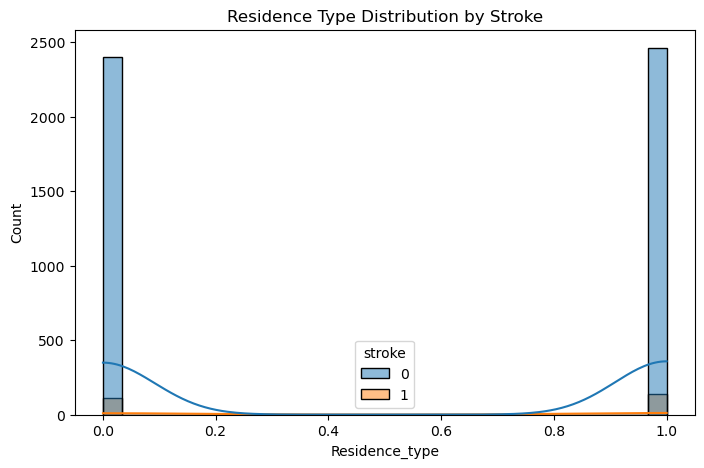

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Residence_type', hue='stroke', bins=30, kde=True)
plt.title("Residence Type Distribution by Stroke")

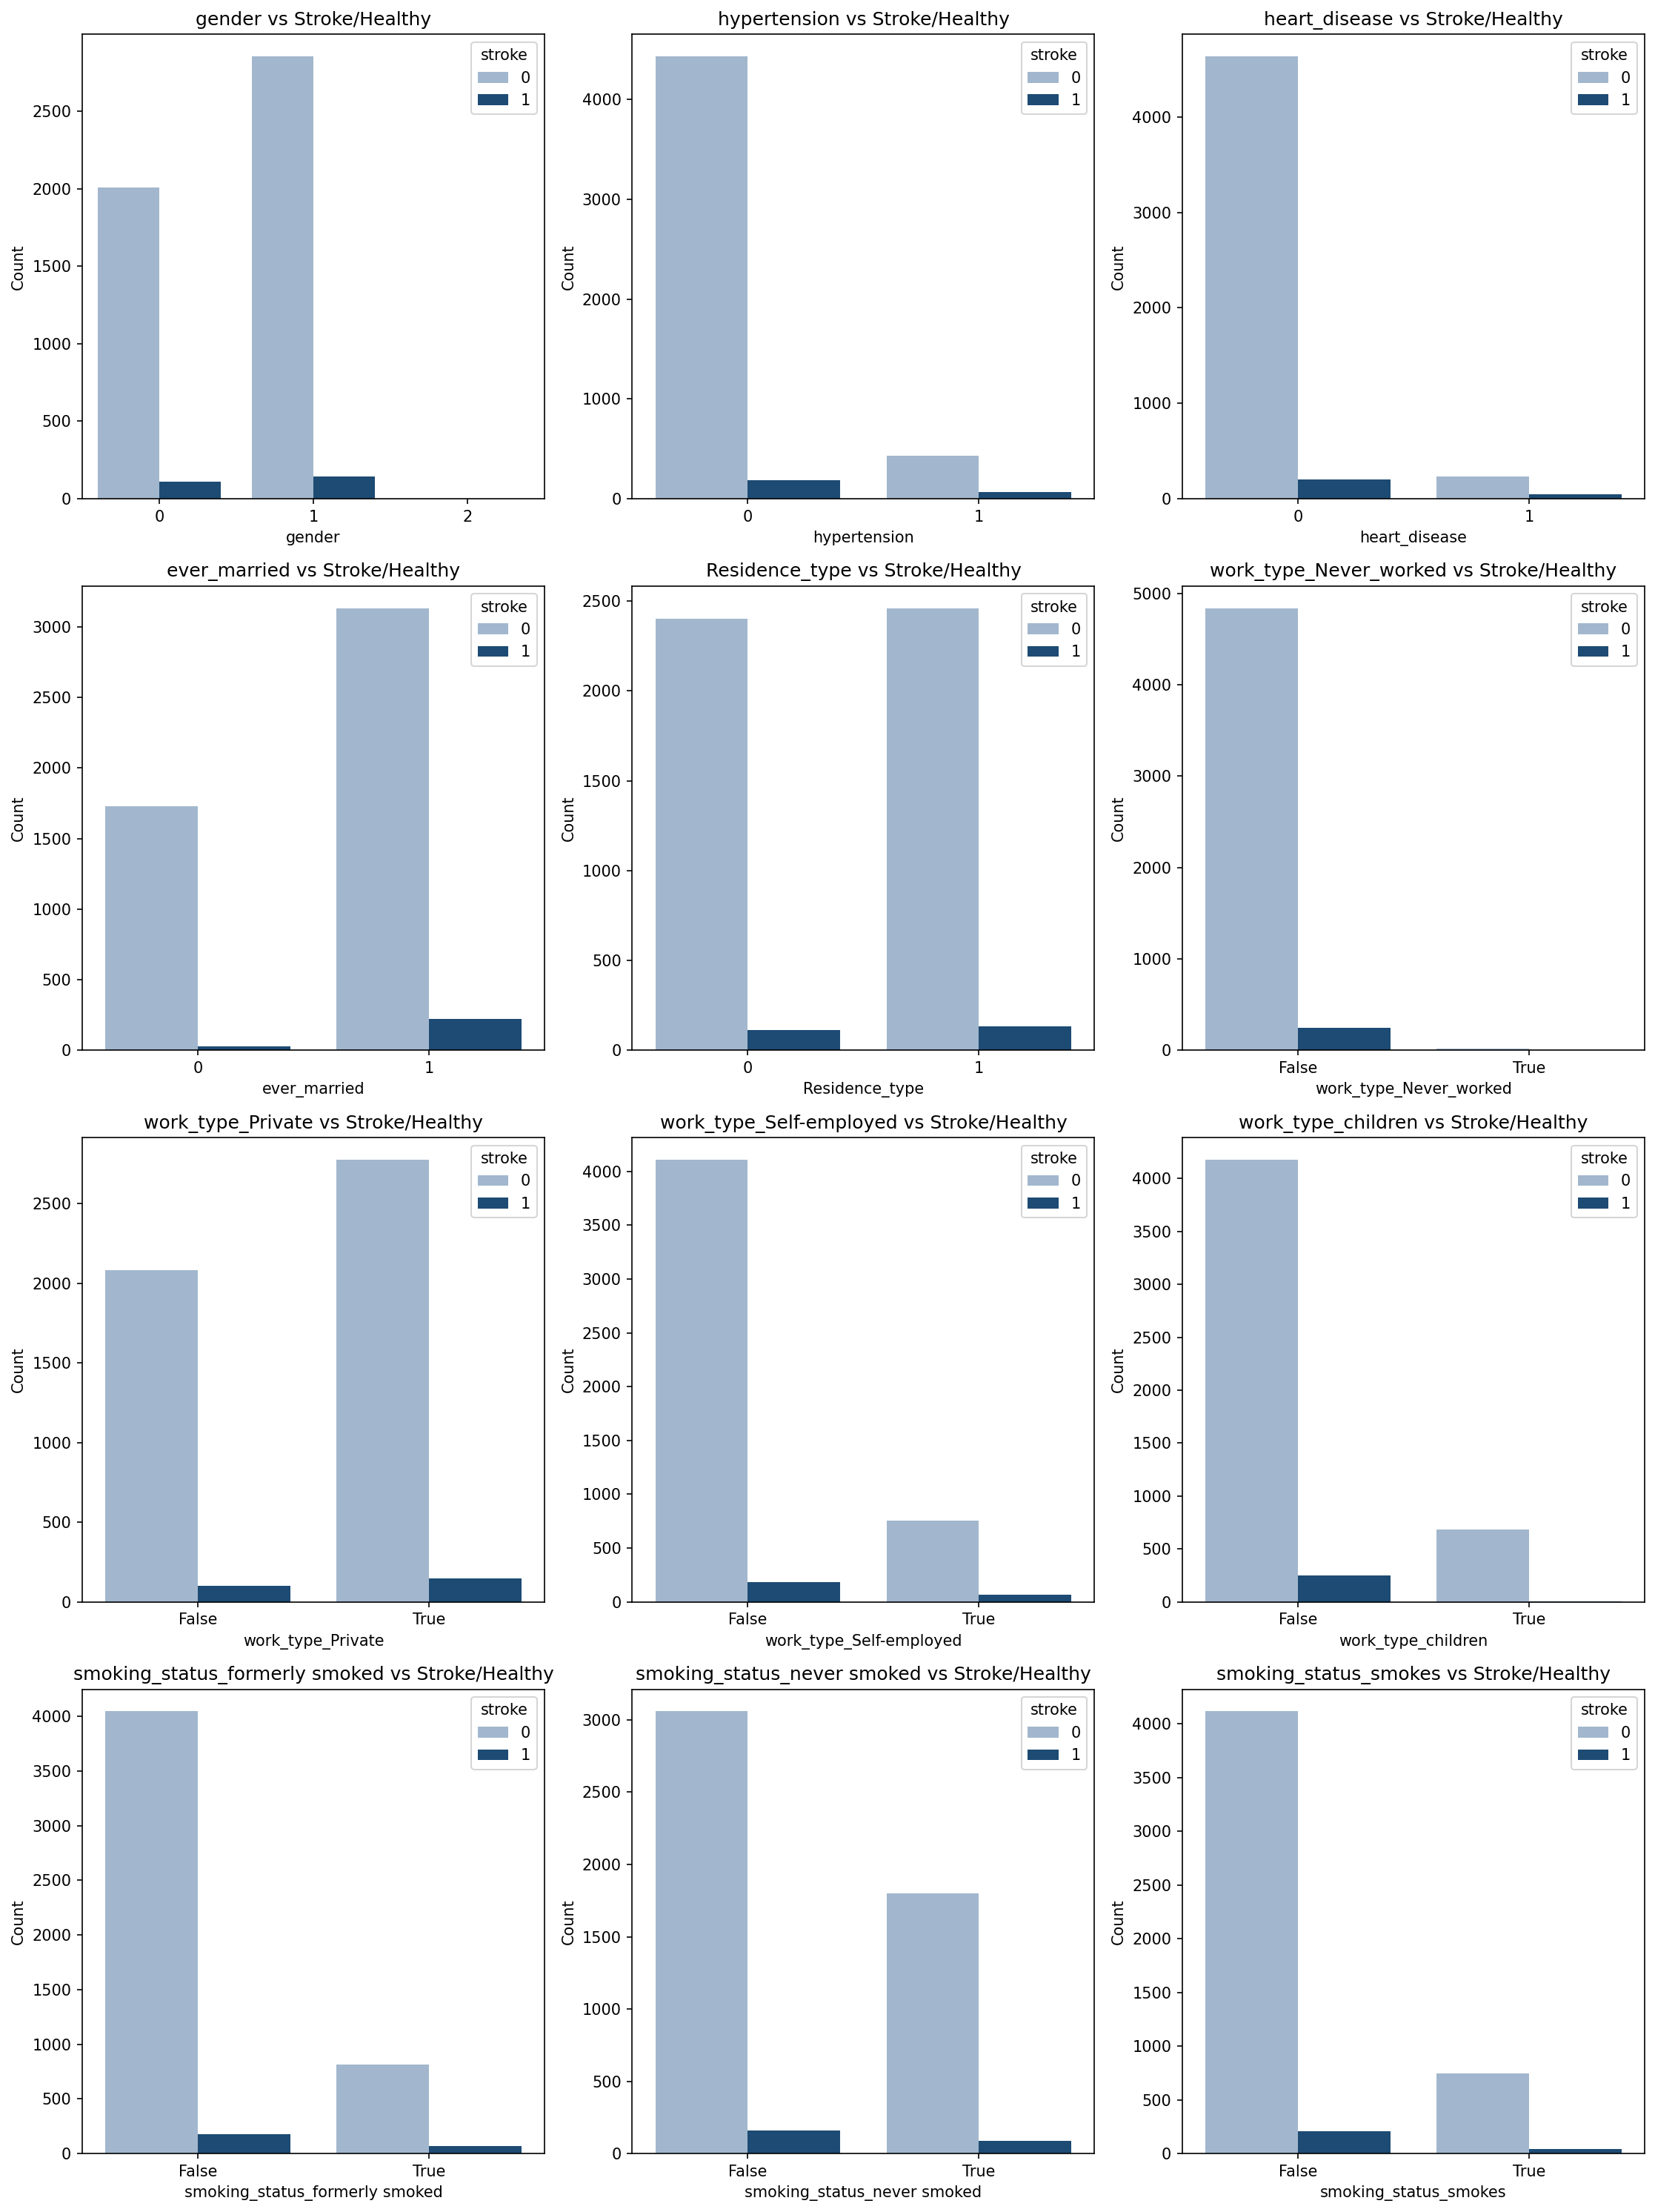

In [38]:
# Categorical predictors
cat_predictors = [variable for variable in df.columns if variable not in ['id','stroke','age','avg_glucose_level','bmi']]

# Calculate the number of rows and columns needed based on the number of predictors
num_rows = len(cat_predictors) // 3 + (len(cat_predictors) % 3 > 0)  # Round up to the nearest integer
num_cols = min(len(cat_predictors), 3)

# Set up the figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows), dpi=150)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical predictor
for i, predictor in enumerate(cat_predictors):
    # Create countplot
    sns.countplot(x=predictor, hue='stroke', data=df, ax=axes[i], palette={0: '#9bb7d4', 1: '#0f4c81'})
    
    # Set labels and title
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{predictor} vs Stroke/Healthy')

# Hide unused subplots
for j in range(len(cat_predictors), num_rows * num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [39]:
# Modeling Prep
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC-AUC Score: 0.7797633744855967


/var/folders/sv/8qrp9kb16sjbbcys97bsvg900000gn/T/ipykernel_19679/24995412.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


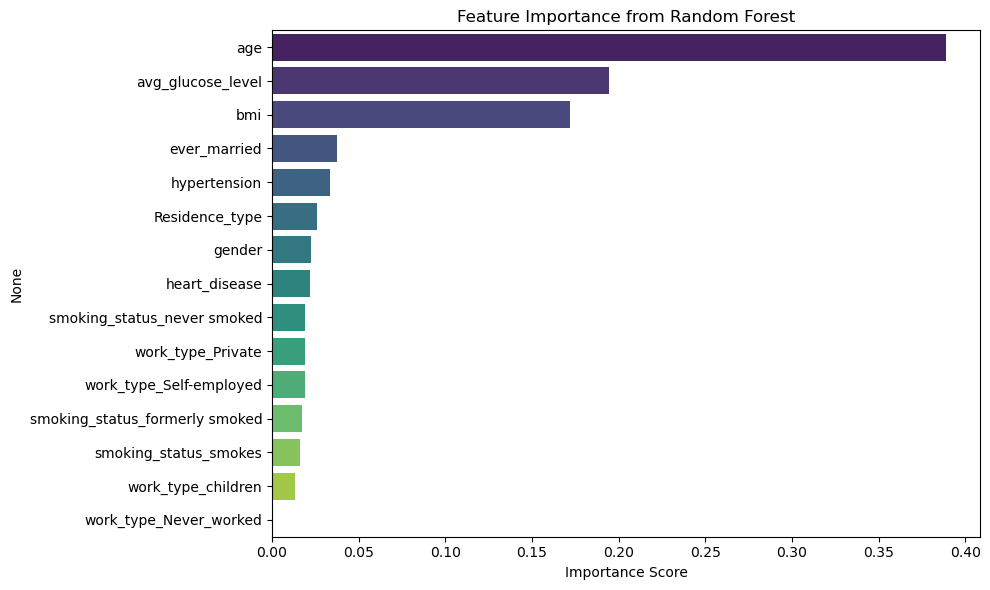

In [40]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()

In [41]:
# Summary
summary = {
    "Top Predictors": sorted(zip(X.columns, model.feature_importances_), key=lambda x: -x[1])[:5],
    "Class Imbalance": y.value_counts(normalize=True).to_dict(),
    "Model ROC-AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
}
print(summary)

{'Top Predictors': [('age', 0.3889320963064551), ('avg_glucose_level', 0.19443441868538092), ('bmi', 0.17202777733313687), ('ever_married', 0.03741140088034975), ('hypertension', 0.03354483614954458)], 'Class Imbalance': {0: 0.9512720156555773, 1: 0.0487279843444227}, 'Model ROC-AUC': 0.7797633744855967}


# Stroke Risk Analysis Summary

## Key Findings
- **Stroke Prevalence**: Stroke cases are relatively rare in the dataset.
- **Age Factor**: Stroke risk increases significantly with age, especially beyond 60.
- **Health Indicators**:
  - Higher average glucose levels and BMI are associated with stroke cases.
  - Hypertension and heart disease show strong correlation with stroke.
- **Lifestyle Factors**:
  - Smoking status (especially current and former smokers) correlates with higher stroke risk.
- **Feature Importance**:
  - Top predictors include `age`, `avg_glucose_level`, `bmi`, `hypertension`, and `heart_disease`.

## Recommendations
- Focus on preventive care for older adults with chronic conditions.
- Monitor glucose and BMI levels as part of routine health checks.
- Target smoking cessation programs to reduce stroke risk.
- Use balanced classification models due to class imbalance in stroke data.

TODO: Step through this notebook and distribute some explanation with the code cells.